## Kmeans, DBSCAN and GMM Lab
In this notebook, we will compare 3 different clustering algorithms Kmeans, DBSCAN and GMM on Iris dataset.

In [1]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


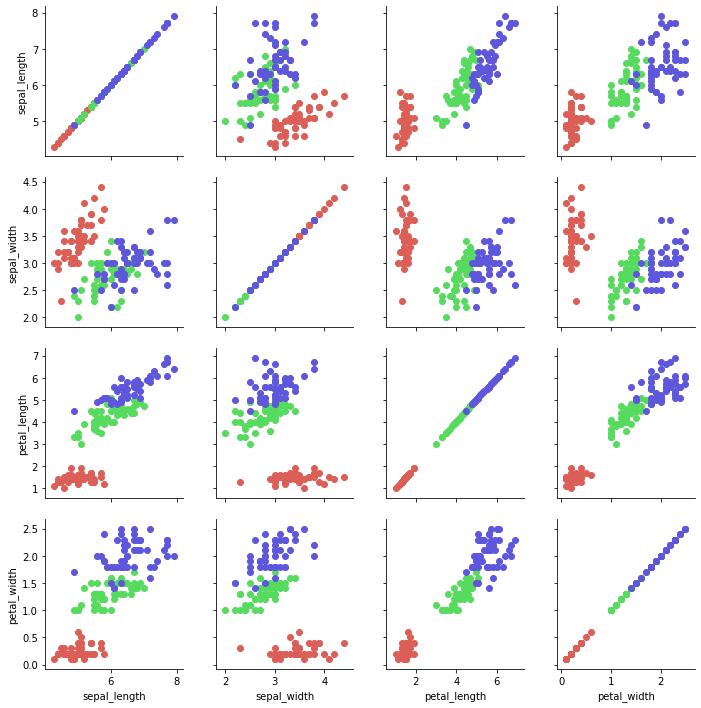

In [3]:
vars = ['sepal_length','sepal_width','petal_length','petal_width']
g = sns.PairGrid(iris, hue="species", palette=sns.color_palette("hls", 3), vars=vars)
g.map(plt.scatter)
plt.show()

### 1. Kmeans Clustering

In [4]:
X = iris[vars]

In [5]:
kmeans_iris = KMeans(n_clusters=3)
pred_kmeans_iris = kmeans_iris.fit_predict(X)

iris['kmeans_pred'] = pred_kmeans_iris

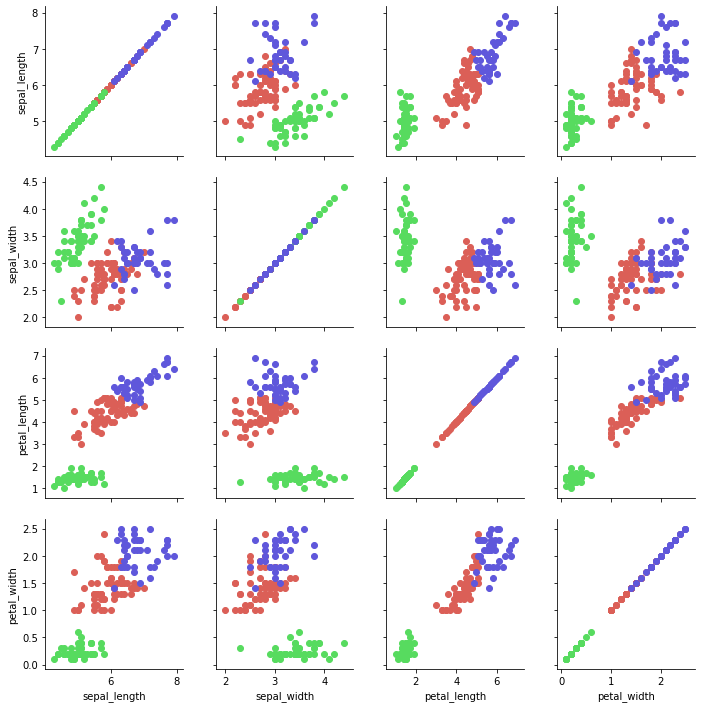

In [6]:
g = sns.PairGrid(iris, hue="kmeans_pred", palette=sns.color_palette("hls", 3), vars=vars)
g.map(plt.scatter)
plt.show()

In [7]:
# Calculate adjusted rand score 
iris_kmeans_score = adjusted_rand_score(iris['species'], iris['kmeans_pred'])
print('Kmeans ARI Score:', iris_kmeans_score)

Kmeans ARI Score: 0.7302382722834697


### 2. DBSCAN Clustering

In [8]:
dbscan_iris = DBSCAN(eps=1, min_samples=20)
pred_dbscan_iris = dbscan_iris.fit_predict(X)

iris['dbscan_pred'] = pred_dbscan_iris

In [9]:
# Calculate adjusted rand score 
iris_dbscan_score = adjusted_rand_score(iris['species'], iris['dbscan_pred'])
print('DBSCAN ARI Score:', iris_dbscan_score)

DBSCAN ARI Score: 0.5621364251426576


### 3. GMM Clustering

In [10]:
gmm_iris = GaussianMixture(n_components=3).fit(X)
pred_gmm_iris = gmm_iris.predict(X)

iris['gmm_pred'] = pred_gmm_iris

In [11]:
# Calculate adjusted rand score 
iris_gmm_score = adjusted_rand_score(iris['species'], iris['gmm_pred'])
print('GMM ARI Score:', iris_gmm_score)

GMM ARI Score: 0.9038742317748124


> We can see that GMM algorithm did better job on clustering than 2 other algorithms Kmeans and DBScan.